In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from gps.experiment import Experiment
from gps.config import set_config, load_config

In [2]:


def plot_tsne_by_class(list_of_tensors):
    """
    Generates a 2D t-SNE plot where points are colored by their class.

    Args:
        list_of_tensors: A list where each element is a tensor of shape (n_i, h).
                         The index of the list is treated as the class label.
    """
    # 1. Combine tensors into a single numpy array and create labels
    all_data = []
    all_labels = []
    for class_id, tensor_data in enumerate(list_of_tensors):
        # Convert tensor to numpy array if it's not already
        if isinstance(tensor_data, torch.Tensor):
            numpy_data = tensor_data.cpu().numpy()
        else:
            numpy_data = np.array(tensor_data)
            
        all_data.append(numpy_data)
        # Create labels for each data point in the current class
        labels = np.full(numpy_data.shape[0], class_id)
        all_labels.append(labels)

    # Concatenate all data and labels
    X = np.vstack(all_data)
    y = np.concatenate(all_labels)

    # 2. Apply t-SNE
    print(f"Applying t-SNE on data of shape: {X.shape}...")
    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
    X_embedded = tsne.fit_transform(X)

    # 3. Plot the results
    plt.figure(figsize=(10, 8))
    # Use a colormap suitable for categorical data (e.g., 'Paired', 'Set1', 'viridis')
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='Paired', s=50)
    
    # Create a legend
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    
    plt.title("t-SNE plot colored by class")
    plt.xlabel("t-SNE component 1")
    plt.ylabel("t-SNE component 2")
    plt.show()


## Data:
    - 90 data point in train loader
    - 10 classes

### SS_GNN:
    - Encodings of graph data with label `i` is stored in `ss_dist`. 
    - hidden_dim: representions shape
    - with the tsne plot we show that ss_gnn can distinguish graphs of different label. 

16:00:01 | INFO | Using Uniform sampler
16:00:01 | INFO | ============================================================
16:00:01 | INFO | Building experiment components...
16:00:01 | INFO | ============================================================
16:00:01 | INFO | → Building model...
16:00:01 | INFO |   ✓ Model built: 370 params (370 trainable)
16:00:01 | INFO | → Building loss criterion...
16:00:01 | INFO |   ✓ Criterion: CrossEntropyLoss
16:00:01 | INFO | → Building dataloaders (this may take a while)...
16:00:01 | INFO |   ✓ Train: 90 batches | Val: 2 batches | Test: 2 batches
16:00:01 | INFO | → Building optimizer...
16:00:01 | INFO |   ✓ Optimizer: Adam (lr=0.001)
16:00:01 | INFO | → Building scheduler...
16:00:01 | INFO |   ✓ Scheduler: ReduceLROnPlateau
16:00:01 | INFO | ============================================================
16:00:01 | INFO | ✓ Build complete - Ready to train!
16:00:01 | INFO | ============================================================
16:00:01 | INFO

Applying t-SNE on data of shape: (90, 5)...


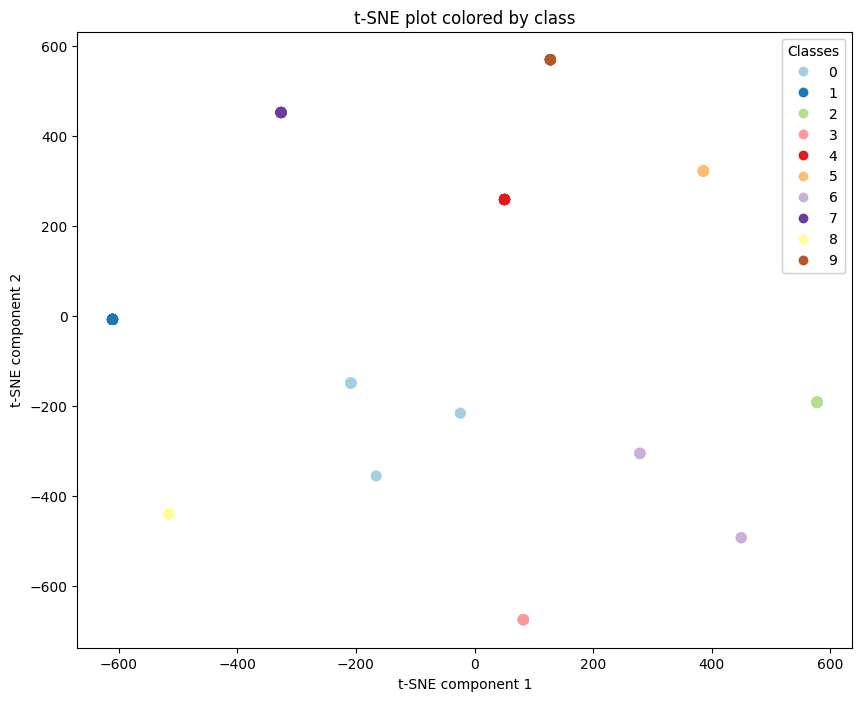

In [16]:
config_file_path = '../configs/ss_gnn/SYNTHETIC/CSL/gcn-k4.json'

# build cfgb
dict_cfg = load_config(config_file_path)
dict_cfg['tracker'] = 'Off'
dict_cfg['train']['train_batch_size'] = 1
dict_cfg['sampler'] = 'uniform'
dict_cfg['device'] = 'cpu'
dict_cfg['model_config']['hidden_dim'] = 5
cfg = set_config(dict_cfg)

# build exp

exp = Experiment(cfg=cfg)

# load model
encoder = exp.model.get_submodule('encoder')


distinct_classes = 10
ss_dists = [[] for _ in range(distinct_classes)]
for batch in exp.train_loader:
    data, label = exp._unpack_batch(batch)
    out = encoder(data)
    idx = int(label.item())
    ss_dists[idx].append(out.detach().cpu())

ss_dists = [torch.cat(ss_dists[i]) for i in range(len(ss_dists))]
plot_tsne_by_class(ss_dists)

16:00:50 | INFO | Using Uniform sampler
16:00:50 | INFO | ============================================================
16:00:50 | INFO | Building experiment components...
16:00:50 | INFO | ============================================================
16:00:50 | INFO | → Building model...
16:00:50 | INFO |   ✓ Model built: 260 params (260 trainable)
16:00:50 | INFO | → Building loss criterion...
16:00:50 | INFO |   ✓ Criterion: CrossEntropyLoss
16:00:50 | INFO | → Building dataloaders (this may take a while)...
16:00:50 | INFO |   ✓ Train: 90 batches | Val: 2 batches | Test: 2 batches
16:00:50 | INFO | → Building optimizer...
16:00:50 | INFO |   ✓ Optimizer: Adam (lr=0.001)
16:00:50 | INFO | → Building scheduler...
16:00:50 | INFO |   ✓ Scheduler: ReduceLROnPlateau
16:00:50 | INFO | ============================================================
16:00:50 | INFO | ✓ Build complete - Ready to train!
16:00:50 | INFO | ============================================================
16:00:50 | INFO

Applying t-SNE on data of shape: (90, 5)...


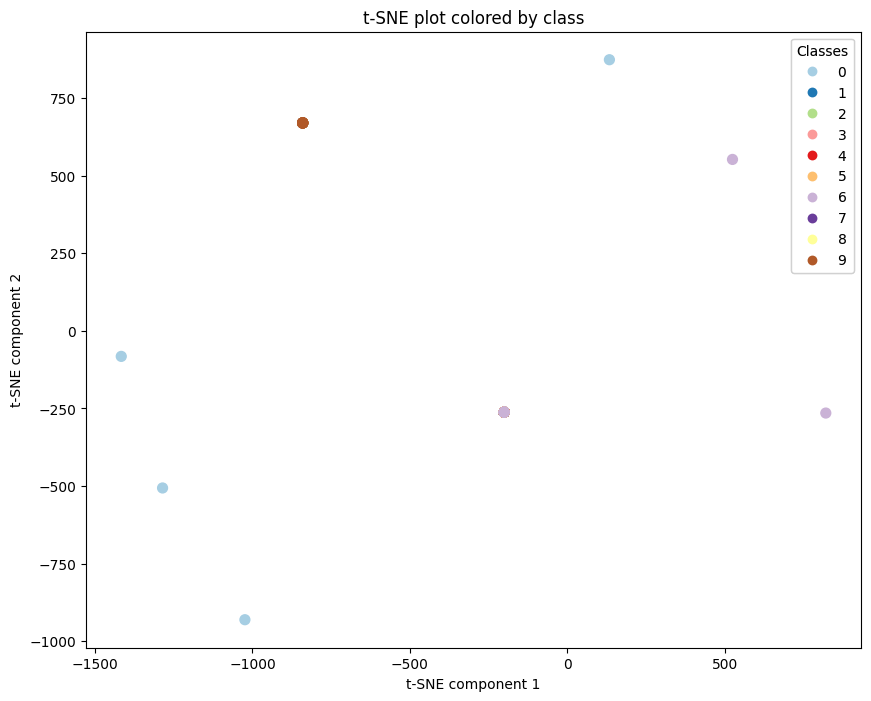

In [18]:
config_file_path = '../configs/vanilla/SYNTHETIC/CSL/gcn.json'

# build cfgb
dict_cfg = load_config(config_file_path)
dict_cfg['tracker'] = 'Off'
dict_cfg['train']['train_batch_size'] = 1
dict_cfg['sampler'] = 'uniform'
dict_cfg['device'] = 'cpu'
dict_cfg['train']['subgraph_sampling'] = 'False'
dict_cfg['model_config']['hidden_dim'] = 5
cfg = set_config(dict_cfg)

# build exp

exp = Experiment(cfg=cfg)

# load model
encoder = exp.model.get_submodule('encoder')


distinct_classes = 10
vanilla_dists = [[] for _ in range(distinct_classes)]
for batch in exp.train_loader:
    data, label = exp._unpack_batch(batch)
    out = encoder(data)
    idx = int(label.item())
    vanilla_dists[idx].append(out.detach().cpu())

vanilla_dists = [torch.cat(vanilla_dists[i]) for i in range(len(vanilla_dists))]
plot_tsne_by_class(vanilla_dists)

### TO DO
    - plot tsne for vanilla [✅]
    - what does it mean? t-SNE plots doesnot help. 
    - plot tsne for ss/vanilla with different data (where gnn collapses)
**❓ though the tsne plot shows clearly that ss-gnn can distinguish cls graph, why it still does not learn.**

**❓ how to aggregate the subgraph representations so that it can distinguish different subgraph distributions.**

**Distinguishibility of Graph Representaions**(only by the first component of the first graph of the list)
    - repersentations of graphs of same label has same encodings(both by SS/Vanilla).
    - ss/vanilla both cannot distinguish graphs of same label. 

In [25]:
for i in range(10):
    print(vanilla_dists[i][0,0])

tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)
tensor(39.6195)


In [24]:
for i in range(10):
    print(ss_dists[i][0,0])

tensor(3.6542)
tensor(4.2954)
tensor(4.8561)
tensor(5.3716)
tensor(4.7631)
tensor(4.7537)
tensor(4.9275)
tensor(4.7216)
tensor(4.5570)
tensor(4.7812)


**Important**: SS-GNN have different encoding for graphs of different labels.